<a href="https://colab.research.google.com/github/derivai7/PCVK_Ganjil_2023/blob/main/Kuis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 10**
- Bahtiar Rifa'i (2141720068)
- Muhammad Halim Perdana (2141720236)
- Patria Anggara Susilo (2141720058)

**Link Yt:**
https://youtu.be/CPdsKXTpjbI

**Linka Dataset**
https://drive.google.com/drive/folders/149o0T0YC5PApDK_9N5Gg0ta-KLVQrx_2

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind``

In [ ]:
import cv2
import numpy as np
import os
import pytesseract
from matplotlib import pyplot as plt
from pytesseract import Output
from PIL import Image

**Preprocessing**

In [ ]:
def preprocess_image(image):
    # Konversi gambar ke skala abu-abu
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Membuat kernel untuk operasi morfologi
    kernel = np.ones((5, 5), np.uint8)

    # Operasi morfologi opening
    opened_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)

    # Operasi erosi untuk menghilangkan noise dan menebalkan teks
    eroded_image = cv2.erode(opened_image, kernel, iterations=1)

    return eroded_image


Processing images in folder: InfinixHot11


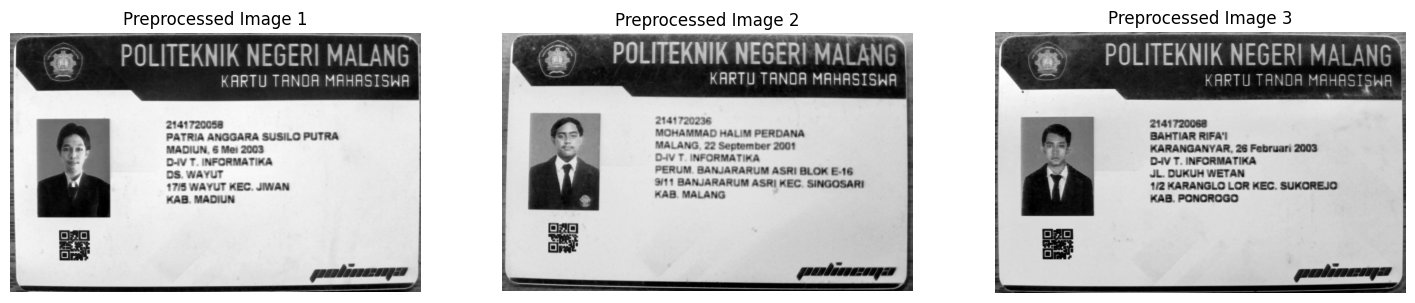


Processing images in folder: AsusZenfone9


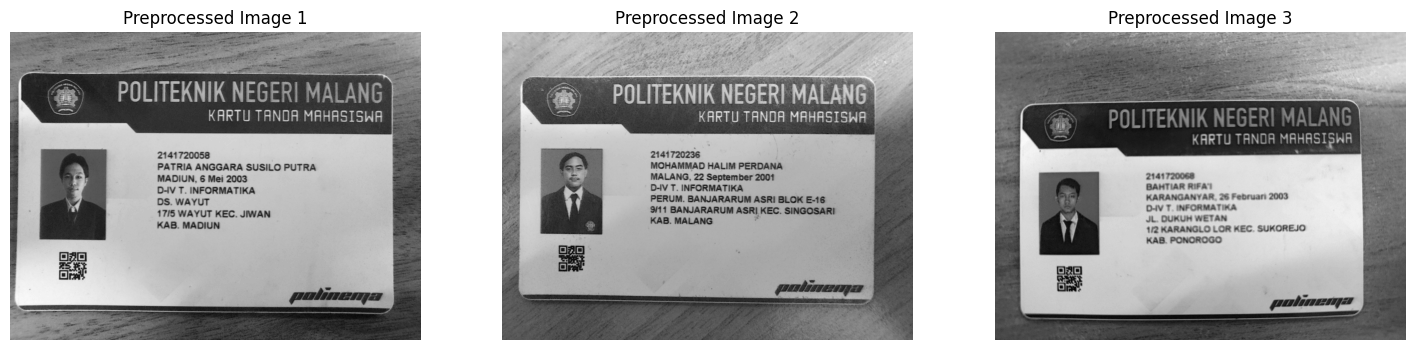


Processing images in folder: SamsungA32


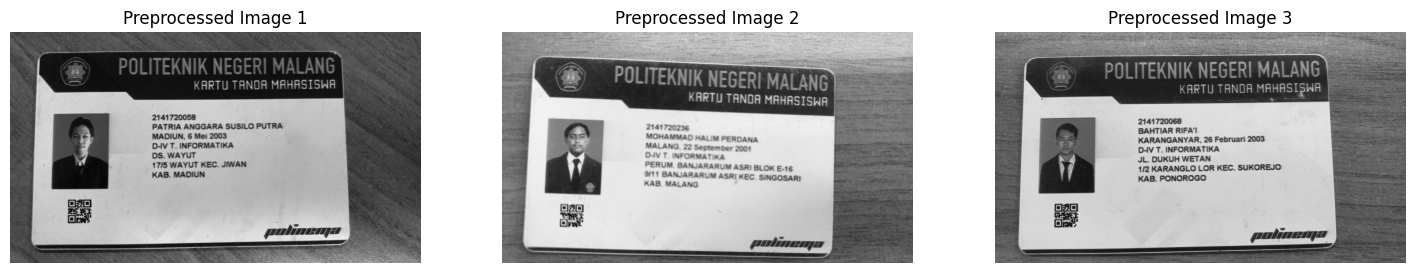

In [ ]:
# Path utama tempat dataset disimpan
main_folder_path = '/content/drive/MyDrive/Dataset/'

# Loop melalui setiap folder dalam path utama
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)

    # Pastikan yang diakses adalah folder (bukan file)
    if os.path.isdir(folder_path):
        print(f"\nProcessing images in folder: {folder_name}")

        # Membuat plot dengan ukuran tertentu
        plt.figure(figsize=(18, 6))

        # Loop melalui setiap file dalam folder
        for idx, filename in enumerate(os.listdir(folder_path)):
            file_path = os.path.join(folder_path, filename)

            # Baca gambar asli dari file
            original_image = cv2.imread(file_path)

            # Lakukan preprocessing pada gambar
            preprocessed_img = preprocess_image(original_image)

            # Tampilkan gambar hasil preprocessing dalam subplot
            plt.subplot(1, 3, idx + 1)
            plt.imshow(preprocessed_img, cmap='gray')

            # Beri judul pada setiap subplot
            plt.title(f'Preprocessed Image {idx + 1}')

            # Sembunyikan sumbu x dan y pada plot
            plt.axis('off')

        # Tampilkan plot dengan semua subplot
        plt.show()

**Detect Image**

In [ ]:
def detect_text(img):
    # Konversi gambar ke skala warna RGB
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Menggunakan Tesseract untuk mendeteksi teks pada gambar
    detected_text = pytesseract.image_to_string(image_rgb, lang="ind")

    # Mengembalikan teks yang terdeteksi
    return detected_text

def detect_and_draw_boxes(image, confidence_threshold=60):
    # Salin gambar asli untuk menghindari modifikasi langsung
    image_with_boxes = image.copy()

    # Menggunakan Tesseract untuk mendeteksi kotak dan teks pada gambar yang telah dipreproses
    d = pytesseract.image_to_data(preprocess_image(image), output_type=Output.DICT)
    n_boxes = len(d['text'])

    # Loop melalui setiap kotak yang terdeteksi
    for i in range(n_boxes):
        # Kondisi untuk hanya mempertimbangkan kotak dengan kepercayaan di atas ambang batas
        if int(d['conf'][i]) > confidence_threshold:
            # Mendapatkan koordinat dan ukuran kotak
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])

            # Menggambar kotak pada gambar asli
            image_with_boxes = cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Memisahkan channel warna untuk mengonversi dari BGR ke RGB
    b, g, r = cv2.split(image_with_boxes)

    # Menggabungkan channel kembali
    rgb_img = cv2.merge([r, g, b])

    # Mengembalikan gambar dengan kotak yang telah digambar
    return rgb_img


Detected images in folder: InfinixHot11


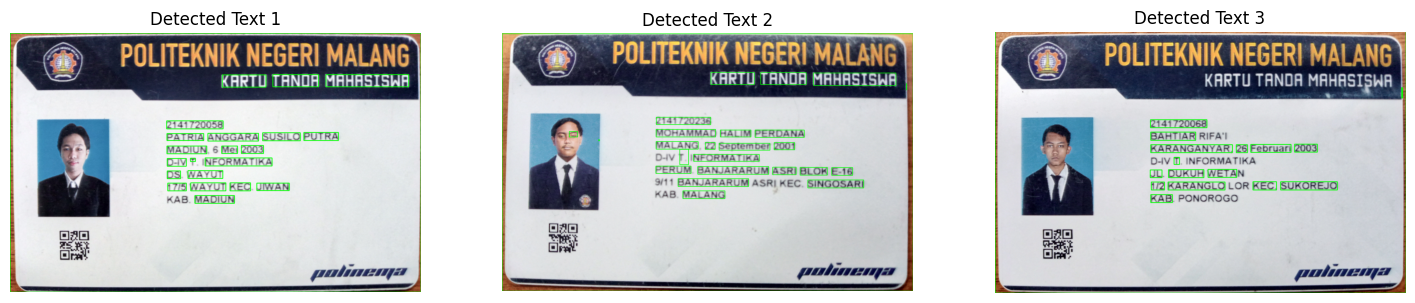


Detected images in folder: AsusZenfone9


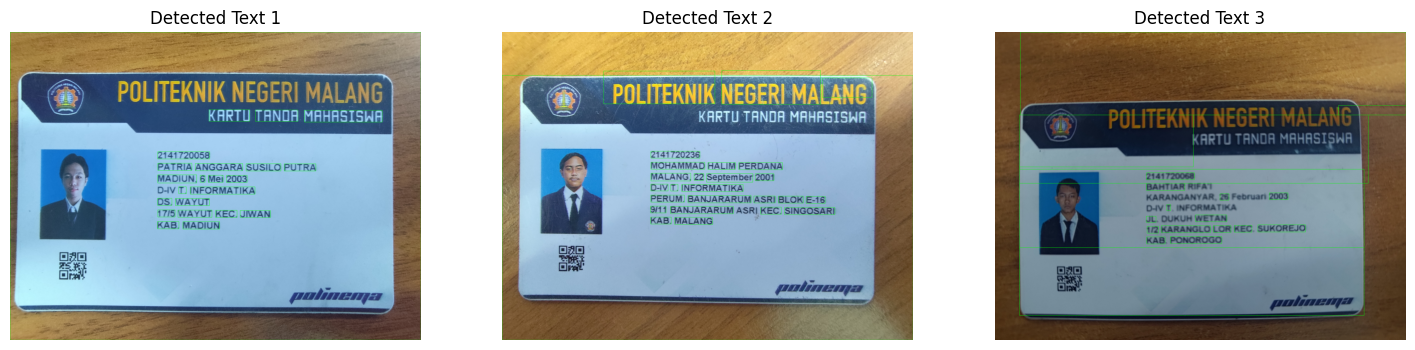


Detected images in folder: SamsungA32


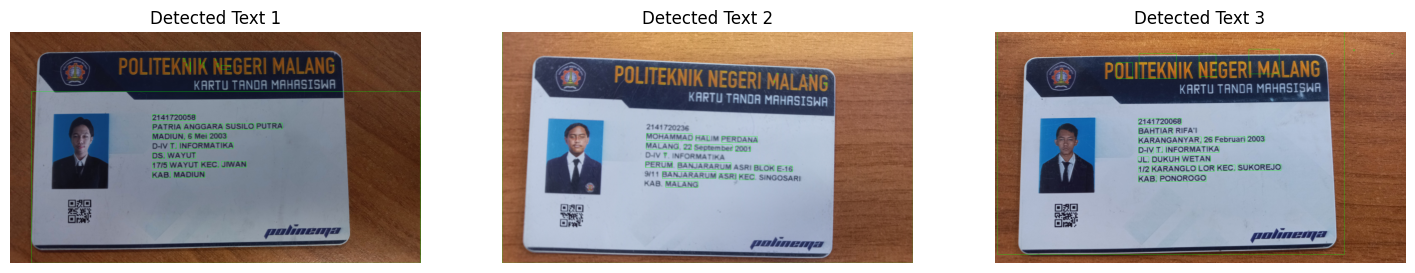

In [ ]:
# Loop melalui setiap folder dalam path utama
for folder_name in os.listdir(main_folder_path):
    # Dapatkan path lengkap ke folder
    folder_path = os.path.join(main_folder_path, folder_name)

    # Pastikan yang diakses adalah folder (bukan file)
    if os.path.isdir(folder_path):
        # Menampilkan informasi bahwa gambar sedang dideteksi di folder tertentu
        print(f"\nDetected images in folder: {folder_name}")

        # Membuat plot dengan ukuran tertentu
        plt.figure(figsize=(18, 6))

        # Loop melalui setiap file dalam folder
        for idx, filename in enumerate(os.listdir(folder_path)):
            # Dapatkan path lengkap ke file
            file_path = os.path.join(folder_path, filename)

            # Baca gambar asli dari file
            original_image = cv2.imread(file_path)

            # Deteksi dan gambar kotak pada gambar asli
            result_image = detect_and_draw_boxes(original_image)

            # Tampilkan gambar hasil deteksi dalam subplot
            plt.subplot(1, 3, idx + 1)
            plt.imshow(result_image)

            # Beri judul pada setiap subplot
            plt.title(f'Detected Text {idx + 1}')

            # Sembunyikan sumbu x dan y pada plot
            plt.axis('off')

        # Tampilkan plot dengan semua subplot
        plt.show()

**Detect Text**


Detected text in folder: InfinixHot11


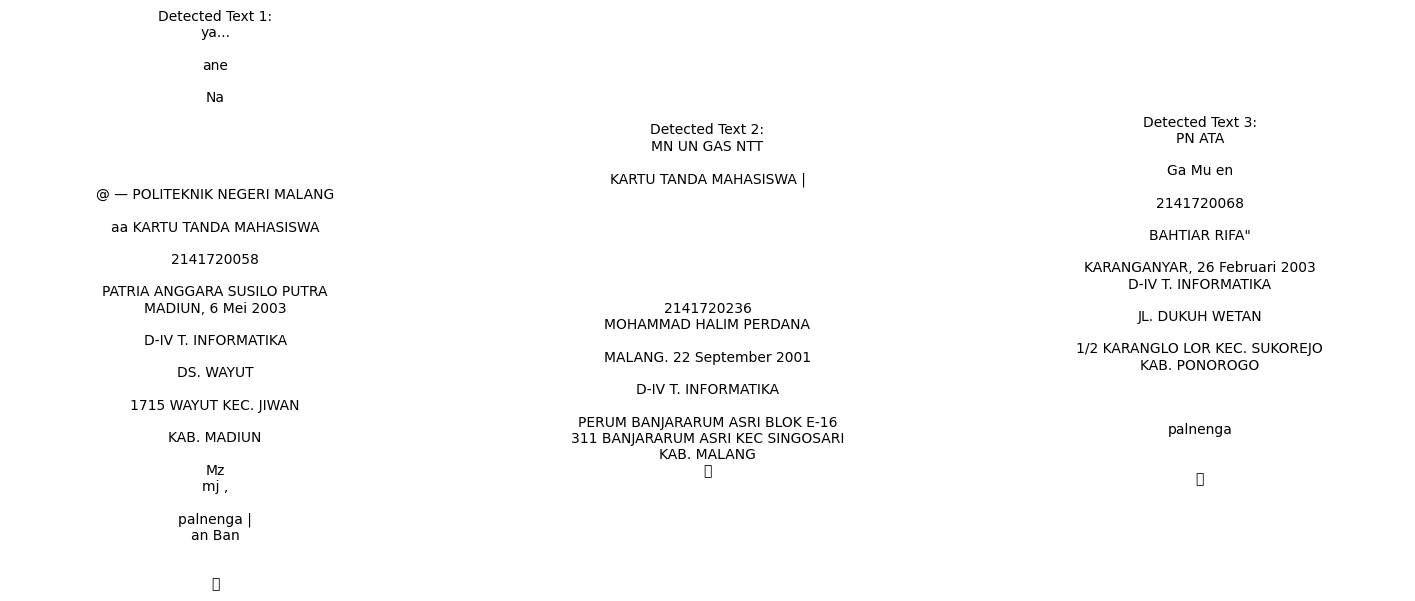


Detected text in folder: AsusZenfone9


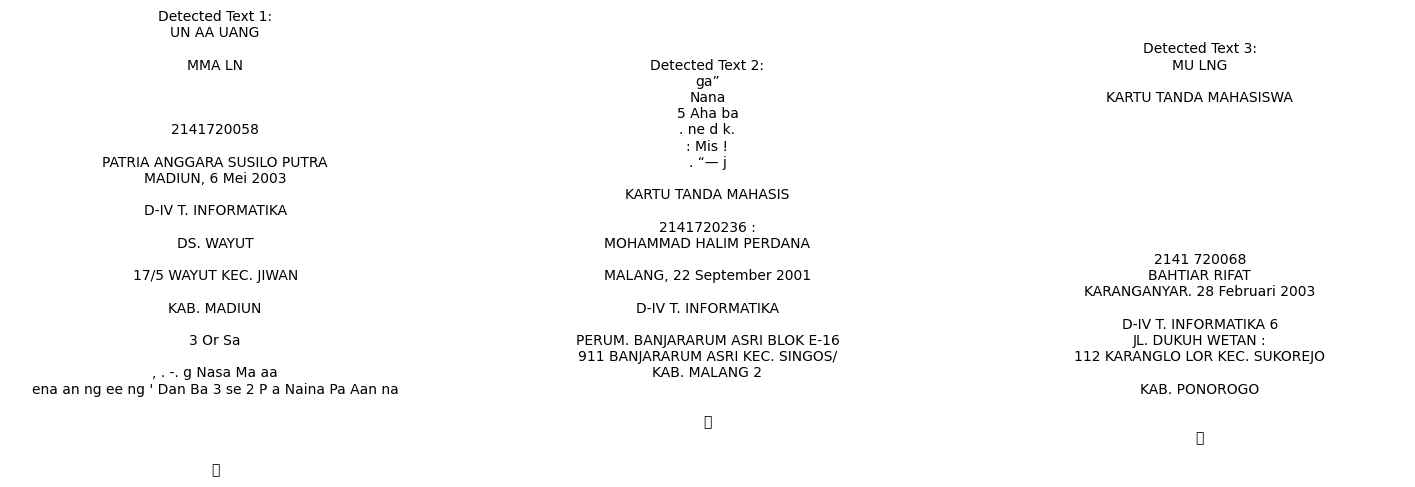


Detected text in folder: SamsungA32


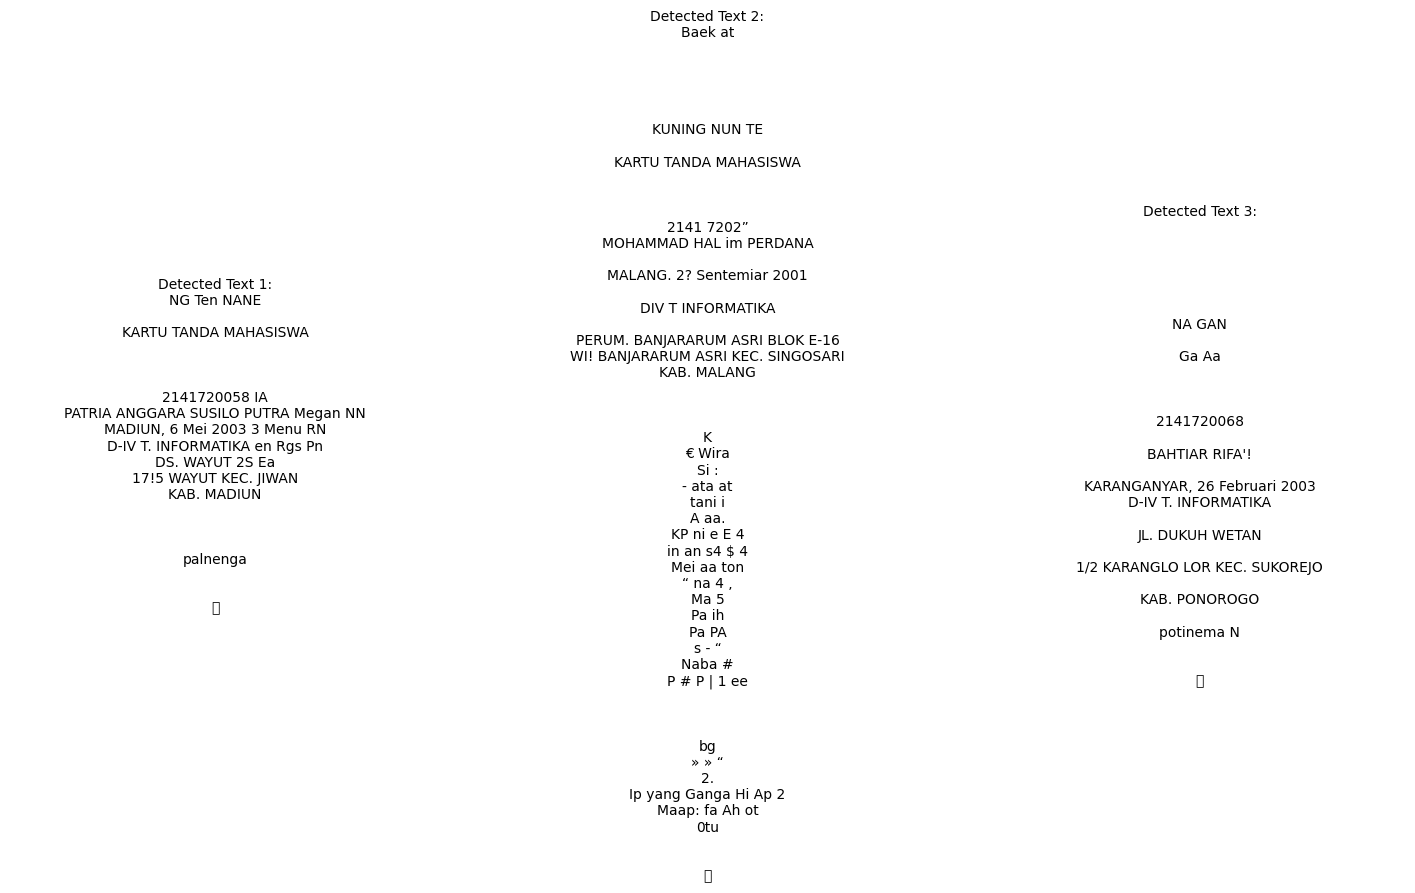

In [ ]:
# Iterasi melalui setiap folder dalam direktori utama (main_folder_path)
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)

    # Periksa apakah objek di dalam direktori adalah folder
    if os.path.isdir(folder_path):
        # Cetak informasi bahwa teks akan dideteksi di dalam folder
        print(f"\nDetected text in folder: {folder_name}")

        # Setel ukuran figur untuk tampilan subplot (maksimal 3 gambar)
        plt.figure(figsize=(18, 6))

        # Ambil tiga gambar pertama dalam folder tersebut
        images_in_folder = os.listdir(folder_path)[:3]

        # Iterasi melalui setiap gambar dalam folder
        for idx, filename in enumerate(images_in_folder):
            file_path = os.path.join(folder_path, filename)
            original_image = cv2.imread(file_path)

            # Deteksi teks pada gambar menggunakan fungsi detect_text
            detected_text = detect_text(original_image)

            # Tampilkan hasil deteksi teks dalam subplot
            plt.subplot(1, 3, idx + 1)
            plt.text(
                0.5, 0.5, f'Detected Text {idx + 1}:\n{detected_text}',
                color='black', backgroundcolor='white',
                transform=plt.gca().transAxes,
                verticalalignment='center', horizontalalignment='center'
            )
            plt.axis('off')

        # Tampilkan semua subplot
        plt.show()